# Xception - New dataset TEST

## Dataset [Brain Tumor Classification - MRI ](https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.transform import resize

from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras

In [ ]:
datadir = '/content/gdrive/MyDrive/Test'
categories = ['no', 'yes']
x = []
y = []

for category in categories:
    path = os.path.join(datadir, category)
    for image in os.listdir(path):
        images = cv2.imread(os.path.join(path, image))
        color = cv2.imread(path, cv2.COLOR_BGR2RGB)
        images = resize(images, (299, 299, 3), mode = 'constant', preserve_range = True)
        x.append(images)
        y.append(categories.index(category))

In [ ]:
no = 0
yes = 0

for i in range(len(x)):
    if y[i] == 0:
        no= no + 1
    elif y[i] == 1:
        yes = yes + 1
        
print("Total Images: ", len(x))
print("Total Images No Tumor: ", no)
print("Total Images Tumor: ", yes)

Total Images:  220
Total Images No Tumor:  105
Total Images Tumor:  115


In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(y))} 
target_val=  [target_dict[y[i]] 
              for i in range(len(y))]

In [ ]:
X_test, y_test = (x,y)# Test

print('Test size:', len(X_test))

Test size: 220


In [ ]:
classes = np.unique (y_test)
classes_num = len(classes)

print ('Outputs: ', classes_num)
print ('Classes: ', classes)

Outputs:  2
Classes:  [0 1]


In [ ]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Bracis/BD/modelXceptionDataAug.h5')

print("TensorFlow version:", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")
model.summary()

TensorFlow version: 2.12.0
Eager mode:  True
GPU is available
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 299, 299, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 299, 299, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 299, 299, 3)      0         
 a)                                                              
                                                                 
 xception (Functional)       (None, None, None, 2048)  20861480  
                                                                 

In [ ]:
x_test = np.array(X_test) 
y_test = np.array(y_test)
print('-----------------------')

print (x_test.shape, y_test.shape)


-----------------------
(220, 299, 299, 3) (220,)


In [ ]:
print ('Loss and Accuracy:')
model.evaluate(x_test, y_test)

Loss and Accuracy:
7/7 [==============================] - 16s 624ms/step - loss: 3.2430 - accuracy: 0.8500


[3.2429590225219727, 0.8500000238418579]

7/7 [==============================] - 2s 216ms/step


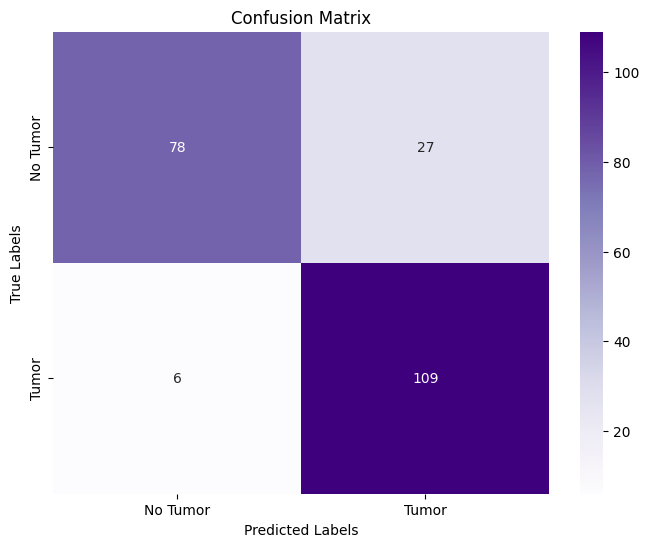

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.round(y_pred)

cmat=confusion_matrix(y_test,y_pred,labels=[0,1])
cm_df = pd.DataFrame(cmat)

cmat_df = pd.DataFrame(cmat,
                     index = ['No Tumor','Tumor' ], 
                     columns = ['No Tumor','Tumor' ])

plt.figure(figsize=(8,6))
sns.heatmap(cmat_df, annot=True,fmt="d",cmap=plt.cm.Purples )
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
tp = cmat[1][1] # True positive
fp = cmat[0][1] # False positive
tn = cmat[0][0] # True negative
fn = cmat[1][0] # False negative

accuracy = ((tp+tn)*100)/np.sum(cmat)
precision = (tp*100)/(tp+fp)
sensibility = (tp*100/(tp+fn))
specificity = (tn*100)/(fp+tn)

print('Metrics')
print('Accuracy:..........>',accuracy,"%")
print('Precision:..........>',precision,"%")
print('Recall:.....>',sensibility,"%")
print('Specificity:....>',specificity,"%")

plt.show()

Metrics
Accuracy:..........> 85.0 %
Precision:..........> 80.1470588235294 %
Recall:.....> 94.78260869565217 %
Specificity:....> 74.28571428571429 %


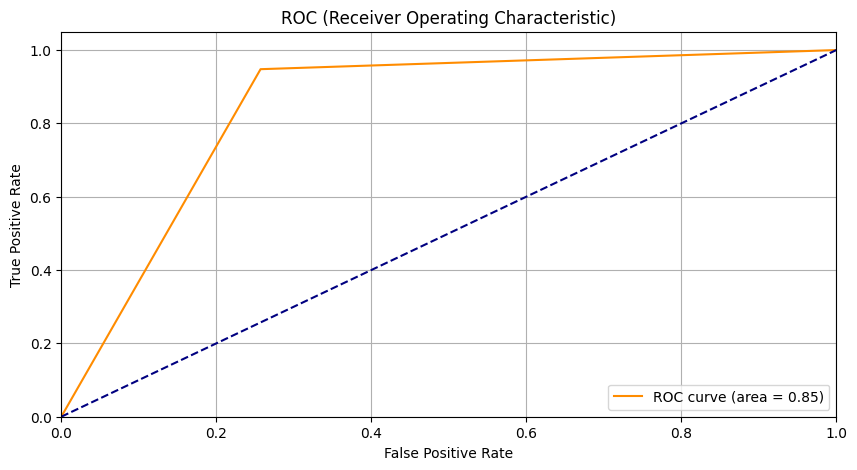

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Predictions

1/1 [==============================] - 1s 548ms/step


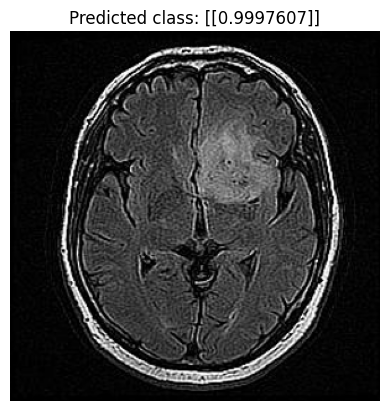

In [ ]:
import numpy as np
from PIL import Image


# Load and preprocess the image Br35H
img = Image.open("/content/gdrive/MyDrive/Tumor/yes/y1200.jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 40ms/step


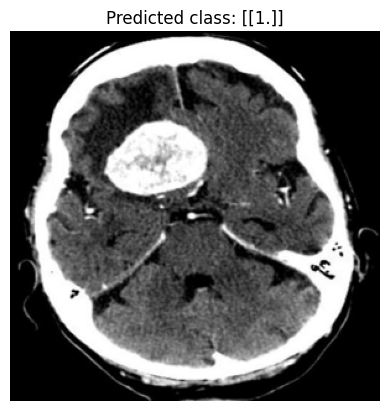

In [ ]:
# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Test/yes/image(124).jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 24ms/step


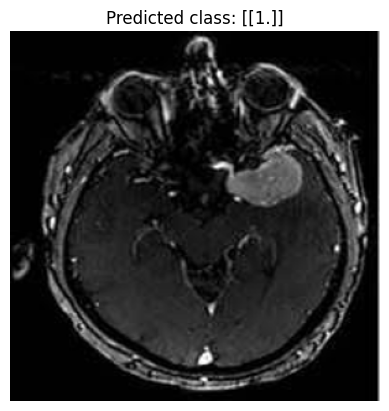

In [ ]:
# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Test/yes/image(12).jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 24ms/step


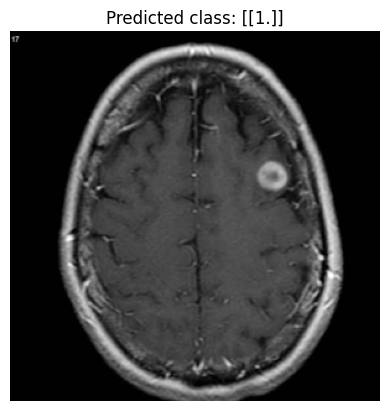

In [ ]:
# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Bracis/BD/brainTumor/pred/pred9.jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 22ms/step


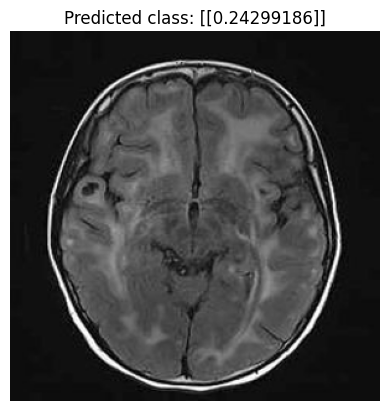

In [ ]:
# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Bracis/BD/brainTumor/pred/pred18.jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 28ms/step


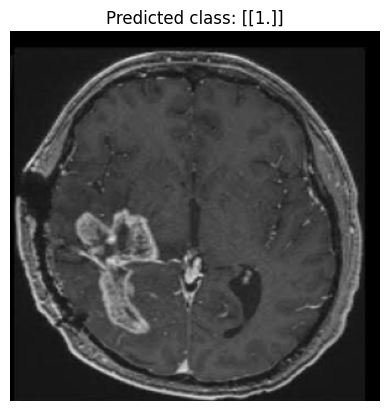

In [ ]:
# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Bracis/BD/brainTumor/pred/pred13.jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 24ms/step


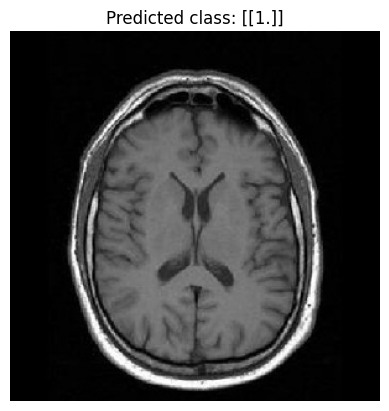

In [ ]:
# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Bracis/BD/brainTumor/pred/pred1.jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 27ms/step


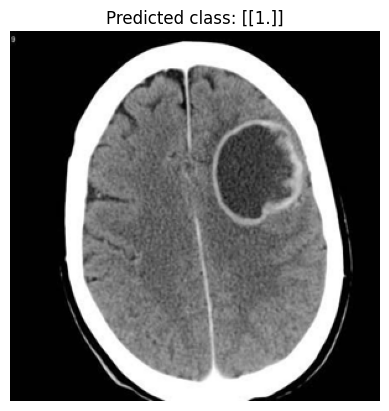

In [ ]:
# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Bracis/BD/brainTumor/pred/pred10.jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 37ms/step


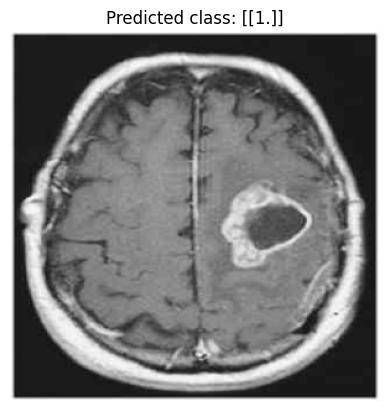

In [ ]:
# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Bracis/BD/brainTumor/pred/pred56.jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 23ms/step


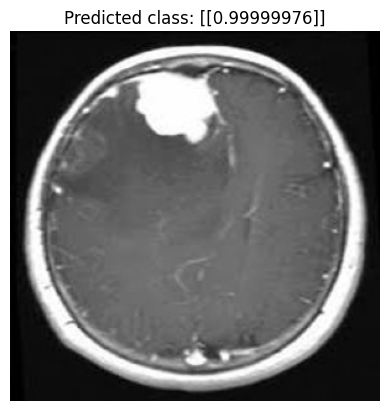

In [ ]:
# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Bracis/BD/brainTumor/pred/pred7.jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 34ms/step


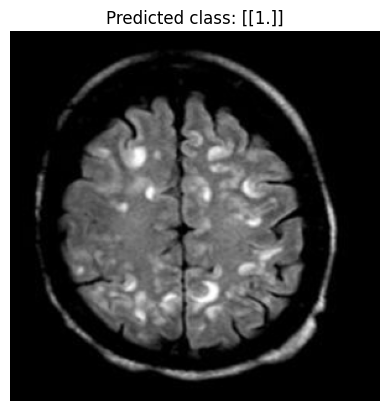

In [ ]:
# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Bracis/BD/brainTumor/pred/pred25.jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 24ms/step


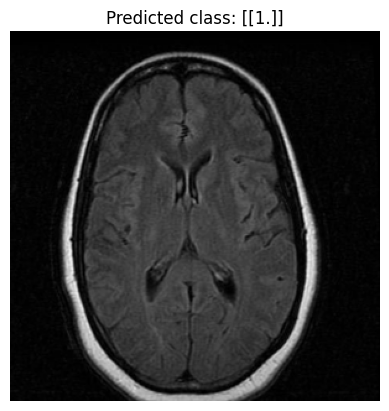

In [ ]:
# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Bracis/BD/brainTumor/pred/pred49.jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 38ms/step


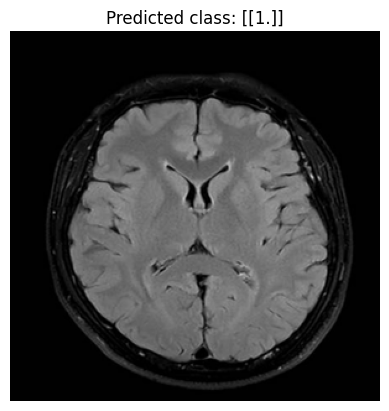

In [ ]:
# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Bracis/BD/brainTumor/pred/pred53.jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 37ms/step


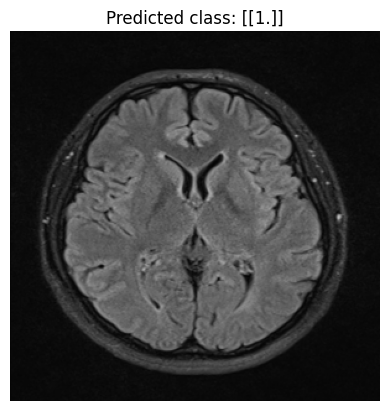

In [ ]:
# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Bracis/BD/brainTumor/pred/pred44.jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 40ms/step


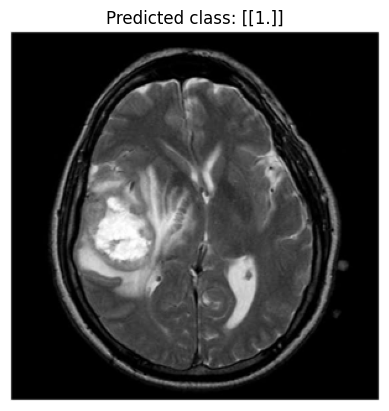

In [ ]:
# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Bracis/BD/brainTumor/pred/pred34.jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 25ms/step


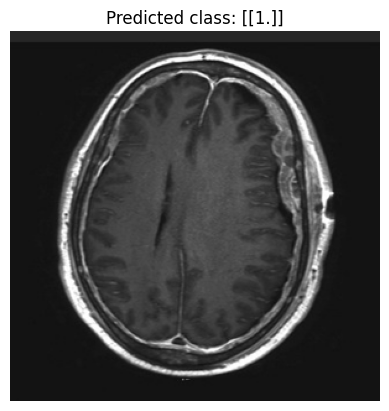

In [ ]:
# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/Bracis/BD/brainTumor/pred/pred26.jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 30ms/step


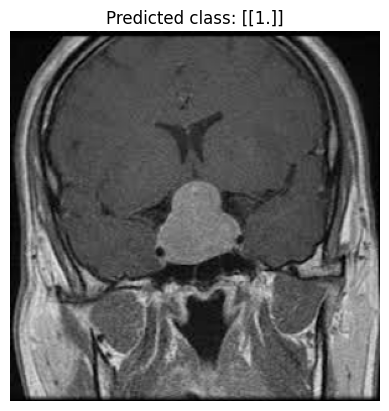

In [ ]:
#pituitary_tumor

# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/pituitary_tumor/020.jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()


1/1 [==============================] - 0s 25ms/step


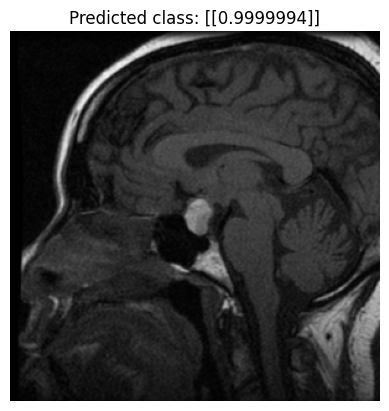

In [ ]:
#pituitary_tumor

# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/pituitary_tumor/001.jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()

1/1 [==============================] - 0s 93ms/step


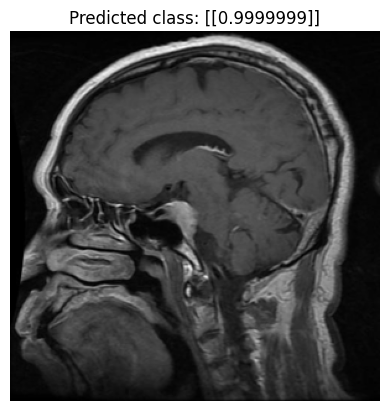

In [ ]:
#pituitary_tumor

# Load and preprocess the image
img = Image.open("/content/gdrive/MyDrive/pituitary_tumor/076.jpg")
img = img.resize((299, 299))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()